# Prova Dati Lavarone Chiesa - 2019-03-21

## Test di Pearson

Matteo Franzoi - 2019-03-21

---

In [21]:
import os
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
from scipy.stats import genextreme, gumbel_r, norm
from numpy import linspace
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

pd.set_option('display.max_rows', 15)

In [22]:
os.getcwd()

'/media/Dati/jupyter/prova'

In [23]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'Coordinate.csv',
 'mLavarone20190321.ipynb',
 'mleLavarone20190321.ipynb',
 'mqLavarone20190321.ipynb',
 'pearsonLavarone20190321ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [24]:
data = pd.read_csv('t0032.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

totale
anno        
1992  1441.8
1993  1380.4
1994  1251.8
1995   944.4
1996  1375.4
1997   821.6
1998     NaN
...      ...
2013  1644.4
2014  2100.6
2015   864.8
2016  1187.8
2017  1039.6
2018  1666.8
2019     NaN

[28 rows x 1 columns]

In [25]:
abs_m = pd.read_pickle('abs_m')
abs_mle = pd.read_pickle('abs_mle')
abs_ls = pd.read_pickle('abs_ls')

In [26]:
abs_m

totale
a  1096.239628
b   264.246186

In [27]:
abs_mle

totale
a  1096.222525
b   260.787335

In [28]:
abs_ls

totale
a  1284.213061
b   580.839493

In [29]:
abs_m - abs_ls

totale
a -187.973432
b -316.593307

In [30]:
abs_m - abs_mle

totale
a  0.017104
b  3.458851

In [31]:
abs_m.at['a', 'totale']

1096.2396284718566

In [32]:
rv = gumbel_r(loc = abs_m.at['a', 'totale'], scale = abs_m.at['b', 'totale'])
rv

In [33]:
q = [.2,.4,.6,.8,1]

In [34]:
htot = rv.ppf(q)
htot

array([ 970.48883328, 1119.34044543, 1273.74092445, 1492.59304984,
                 inf])

In [35]:
ltot = len(data['totale'])
ltot

28

In [36]:
ecdf = ECDF(data['totale'])
r = ecdf(htot)
r

array([0.17857143, 0.25      , 0.35714286, 0.53571429, 0.64285714])

In [38]:
o0 = ltot * r
o0

array([ 5.,  7., 10., 15., 18.])

In [39]:
o = o0 - np.append([0], np.delete(o0, -1))
o

array([5., 2., 3., 5., 3.])

In [40]:
e = [.2 * ltot for i in range(len(r))]
e

[5.6000000000000005,
 5.6000000000000005,
 5.6000000000000005,
 5.6000000000000005,
 5.6000000000000005]

In [41]:
o-e

array([-0.6, -3.6, -2.6, -0.6, -2.6])

In [42]:
(o-e)**2

array([ 0.36, 12.96,  6.76,  0.36,  6.76])

In [43]:
(o-e)**2/e

array([0.06428571, 2.31428571, 1.20714286, 0.06428571, 1.20714286])

In [45]:
((o-e)**2/e).sum()

4.8571428571428585

In [46]:
def X2(data, abs_t, h, delta):
    dt = data[h].dropna()
    lh = len(dt)
    q = [delta*(i+1) for i in range(int(1/delta))]
    rv = gumbel_r(loc = abs_t.at['a',h], scale = abs_t.at['b', h])
    ecdf = ECDF(dt)
    r = ecdf(rv.ppf(q))
    o0 = lh*r
    o = o0 - np.append([0], np.delete(o0,-1))
    e = [delta*lh for i in range(len(r))]
    return ((o-e)**2/e).sum()

In [47]:
X2(data, abs_m, 'totale', .2)

1.9999999999999984

In [48]:
X2(data, abs_mle, 'totale', .2)

1.9999999999999984

In [49]:
X2(data, abs_ls, 'totale', .2)

9.222222222222223

In [51]:
for  h in data.columns:
    print(h,": ",[X2(data,abs_m,h,0.2),X2(data,abs_ls,h,0.2),X2(data,abs_mle,h,0.2)])

totale :  [1.9999999999999984, 9.222222222222223, 1.9999999999999984]


In [53]:
a = []
for h in data.columns:
    a = a + [[X2(data, abs_m, h, .2), X2(data, abs_mle, h, .2), X2(data, abs_ls, h, .2)]]

pd.DataFrame(a, index = ['totale'], columns = ['M', 'MLE', 'LS'])

M  MLE        LS
totale  2.0  2.0  9.222222

In [54]:
best = DataFrame([
    abs_m['totale']
]).T
best

totale
a  1096.239628
b   264.246186

In [55]:
best.to_pickle('best_param')

In [56]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min(),data.max(),100)

In [58]:
gb = pd.DataFrame([
    gumbel(t_rain, best, 'totale')
]).T
gb.index = t_rain
gb.columns = ['totale']
gb

totale
821.600000   0.059171
834.519192   0.067717
847.438384   0.077000
860.357576   0.087020
873.276768   0.097772
886.195960   0.109244
899.115152   0.121417
...               ...
2023.084848  0.970473
2036.004040  0.971862
2048.923232  0.973186
2061.842424  0.974449
2074.761616  0.975654
2087.680808  0.976802
2100.600000  0.977896

[100 rows x 1 columns]

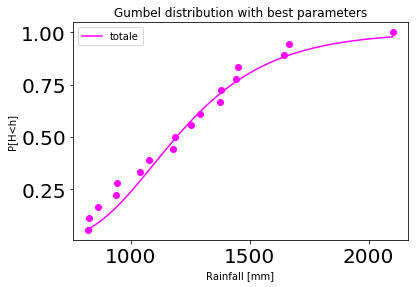

In [59]:
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

ax = gb.plot(color = 'magenta')

datatot = data['totale'].dropna()
ecdf = ECDF(datatot)

ax.plot(datatot, ecdf(datatot), 'o', c = 'magenta')

ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H<h]')
ax.set_title('Gumbel distribution with best parameters')
plt.show()